In [1]:
#all packages which will be used
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import random

#plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib.axes import Axes

#feature selection method
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
#from minepy import MINE

In [6]:
X_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\validation_label.csv")
X_val=X_val.drop("Unnamed: 0",1)
y_val=y_val.drop("Unnamed: 0",1)

In [2]:
X_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\scaled_train_feature.csv")
y_train=pd.read_csv("C:\\Users\\yangshanqi\\Documents\\lab\\labgithubcopy\\task_1_version_2\\result\\train_label.csv")

Filter method according to the correlation between features ,set up the threshold , make scores and select features

## 1 Correlation selection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001903FD5F1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000019040E3D550>]], dtype=object)

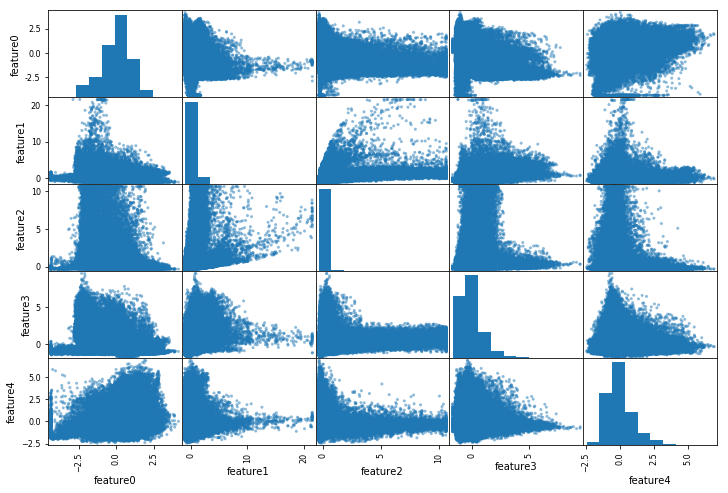

In [6]:
features=['feature0','feature1','feature2','feature3','feature4']
scatter_matrix(X_train[features],figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3FFC6E470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A3814E08D0>]], dtype=object)

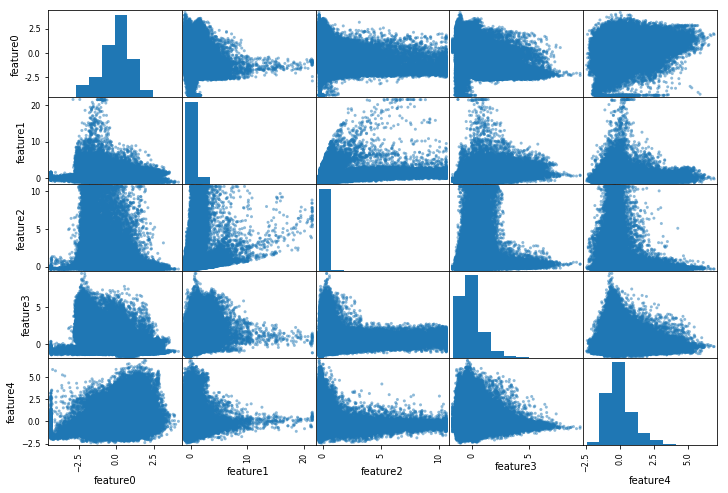

In [15]:
features=['feature0','feature1','feature2','feature3','feature4']
scatter_matrix(X_train[features],figsize=(12,8))

## 2 Chi Squared selection

In [27]:
y_train=y_train['label']
X_train_scaled=MinMaxScaler().fit_transform(X_train)
X_train_scaled

array([[ 0.55796283,  0.06190676,  0.00616678,  0.08787059,  0.09004436],
       [ 0.52632035,  0.06183193,  0.00578177,  0.09211626,  0.10415047],
       [ 0.52983644,  0.05903678,  0.00555798,  0.09684968,  0.08948328],
       ..., 
       [ 0.6181066 ,  0.0470843 ,  0.01960268,  0.09462156,  0.33812615],
       [ 0.4326769 ,  0.04600312,  0.01478891,  0.09416712,  0.38629001],
       [ 0.48878407,  0.04706591,  0.01861467,  0.10983571,  0.23933852]])

## feature 0, 2 and 3 are selected ##

In [31]:
SelectKBest(chi2,k=3).fit_transform(X_train_scaled,y_train)

array([[ 0.55796283,  0.00616678,  0.08787059],
       [ 0.52632035,  0.00578177,  0.09211626],
       [ 0.52983644,  0.00555798,  0.09684968],
       ..., 
       [ 0.6181066 ,  0.01960268,  0.09462156],
       [ 0.4326769 ,  0.01478891,  0.09416712],
       [ 0.48878407,  0.01861467,  0.10983571]])

In [6]:
X_train_scaled

array([[ 0.65234287,  0.15971101,  0.00578201,  0.10317642,  0.17655379],
       [ 0.65902621,  0.15249117,  0.00555821,  0.10847818,  0.14811877],
       [ 0.90721302,  0.15513496,  0.00557537,  0.07649288,  0.3557779 ],
       ..., 
       [ 0.82680868,  0.12161809,  0.0196035 ,  0.10598253,  0.63015833],
       [ 0.47434694,  0.11882541,  0.01478953,  0.10547353,  0.72353276],
       [ 0.58099452,  0.12157058,  0.01861545,  0.12302341,  0.43864049]])

## 3 plot the class

In [34]:
X_train_all=pd.concat([X_train,y_train],axis=1)

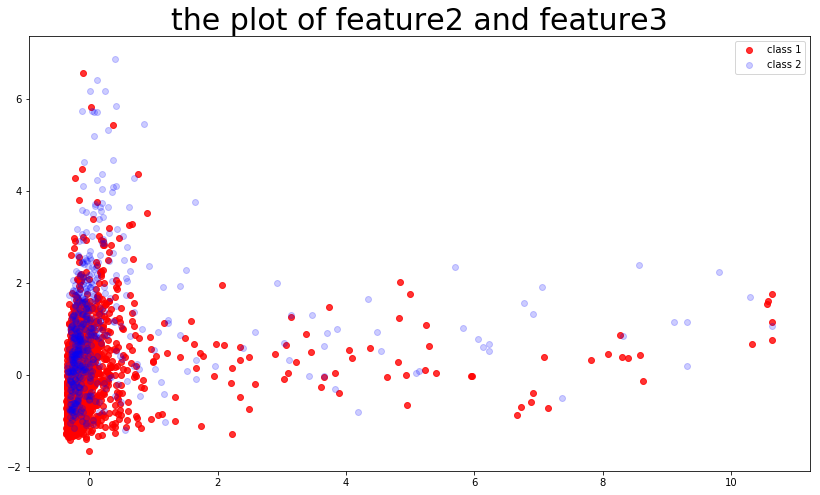

In [67]:
skf=StratifiedKFold(n_splits=100,random_state=42,shuffle=True)
for train_index, test_index in skf.split(X_train,y_train):
    X_train_split,y_train_split=X_train.loc[test_index],y_train.loc[test_index]
    X_train_all=pd.concat([X_train_split,y_train_split],axis=1)
    X_train_1=X_train_split.loc[X_train_all['label']==1.0]
    X_train_2=X_train_split.loc[X_train_all['label']==2.0]
    plot_label(2,3,X_train_1,X_train_2)
    break

In [3]:
def plot_label_separate(feature1,feature2):
    feature_1="feature"+str(feature1)
    feature_2="feature"+str(feature2)
    X_train_1=X_train.loc[y_train['label']==1.0]
    X_train_2=X_train.loc[y_train['label']==2.0]
    
    plt.figure(figsize=(12,4))
    plt.subplot (1,3,1)
   
    plt.title("plot together")
    plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1",alpha=0.8)
    plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.2)
    plt.grid() # == plt.grid(True)
    plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
    plt.legend()
    #plt.show()
    
    plt.subplot (1,3,2)
    #plt.figure(figsize=(8,8))
    plt.title("the plot of label 1")
    plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1")
    #plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.2)
    plt.grid() # == plt.grid(True)
    plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
    plt.legend()
    #plt.show()
    
    plt.subplot (1,3,3)
    #plt.figure(figsize=(8,8))
    plt.title("the plot of label 2")
    #plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1",alpha=0.8)
    plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.8)
    plt.grid() # == plt.grid(True)
    plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
    plt.legend()
    plt.show()
    

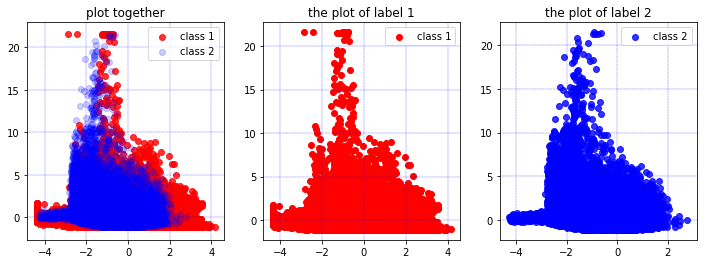

In [4]:
plot_label_separate(0,1)

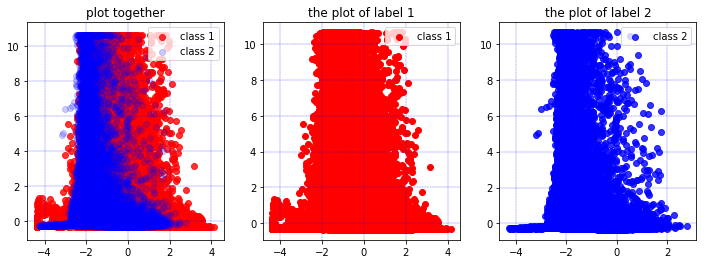

In [43]:
plot_label_separate(0,2)

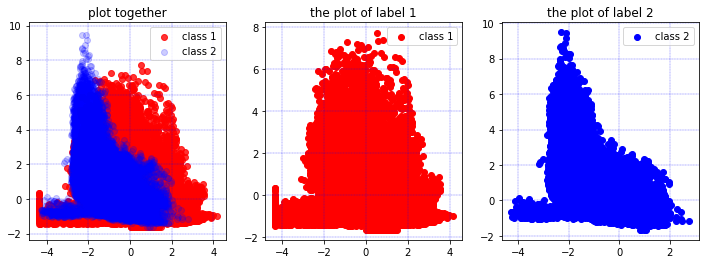

In [41]:
plot_label_separate(0,3)

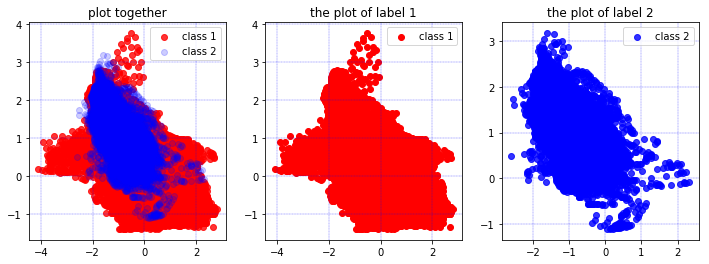

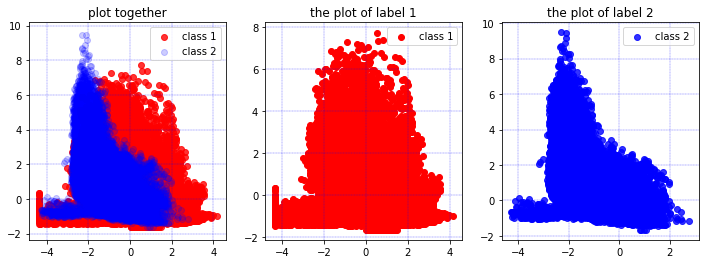

In [11]:
feature_1 = "feature0"
feature_2 = "feature3"

X_train_1=X_val.loc[y_val['label']==1.0]
X_train_2=X_val.loc[y_val['label']==2.0]

plt.figure(figsize=(12,4))
plt.subplot (1,3,1)

plt.title("plot together")
plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1",alpha=0.8)
plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.2)
plt.grid() # == plt.grid(True)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.legend()
#plt.show()

plt.subplot (1,3,2)
#plt.figure(figsize=(8,8))
plt.title("the plot of label 1")
plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1")
#plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.2)
plt.grid() # == plt.grid(True)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.legend()
#plt.show()

plt.subplot (1,3,3)
#plt.figure(figsize=(8,8))
plt.title("the plot of label 2")
#plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1",alpha=0.8)
plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.8)
plt.grid() # == plt.grid(True)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.legend()
plt.show()
X_train_1=X_train.loc[y_train['label']==1.0]
X_train_2=X_train.loc[y_train['label']==2.0]

plt.figure(figsize=(12,4))
plt.subplot (1,3,1)

plt.title("plot together")
plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1",alpha=0.8)
plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.2)
plt.grid() # == plt.grid(True)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.legend()
#plt.show()

plt.subplot (1,3,2)
#plt.figure(figsize=(8,8))
plt.title("the plot of label 1")
plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1")
#plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.2)
plt.grid() # == plt.grid(True)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.legend()
#plt.show()

plt.subplot (1,3,3)
#plt.figure(figsize=(8,8))
plt.title("the plot of label 2")
#plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1",alpha=0.8)
plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.8)
plt.grid() # == plt.grid(True)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.legend()
plt.show()


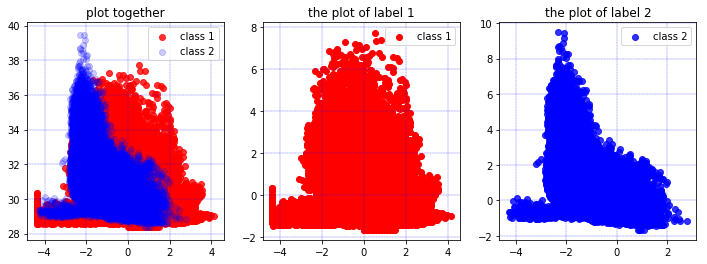

In [14]:
feature_1 = "feature0"
feature_2 = "feature3"

X_train_1=X_train.loc[y_train['label']==1.0]
X_train_2=X_train.loc[y_train['label']==2.0]

plt.figure(figsize=(12,4))
plt.subplot (1,3,1)

plt.title("plot together")
plt.scatter(X_train_1[feature_1],X_train_1[feature_2]+30,c='r',label="class 1",alpha=0.8)
plt.scatter(X_train_2[feature_1],X_train_2[feature_2]+30,c='b',label="class 2",alpha=0.2)
plt.grid() # == plt.grid(True)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.legend()
#plt.show()

plt.subplot (1,3,2)
#plt.figure(figsize=(8,8))
plt.title("the plot of label 1")
plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1")
#plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.2)
plt.grid() # == plt.grid(True)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.legend()
#plt.show()

plt.subplot (1,3,3)
#plt.figure(figsize=(8,8))
plt.title("the plot of label 2")
#plt.scatter(X_train_1[feature_1],X_train_1[feature_2],c='r',label="class 1",alpha=0.8)
plt.scatter(X_train_2[feature_1],X_train_2[feature_2],c='b',label="class 2",alpha=0.8)
plt.grid() # == plt.grid(True)
plt.grid(color='b' , linewidth='0.3' ,linestyle='--')
plt.legend()
plt.show()


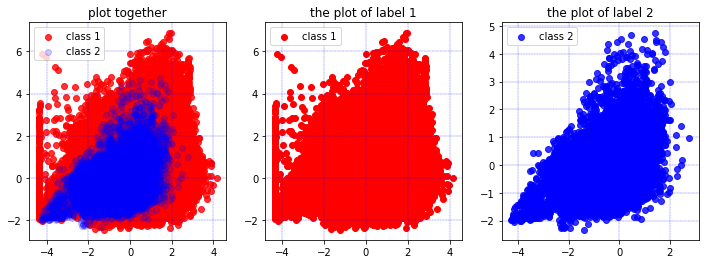

In [5]:
plot_label_separate(0,4)

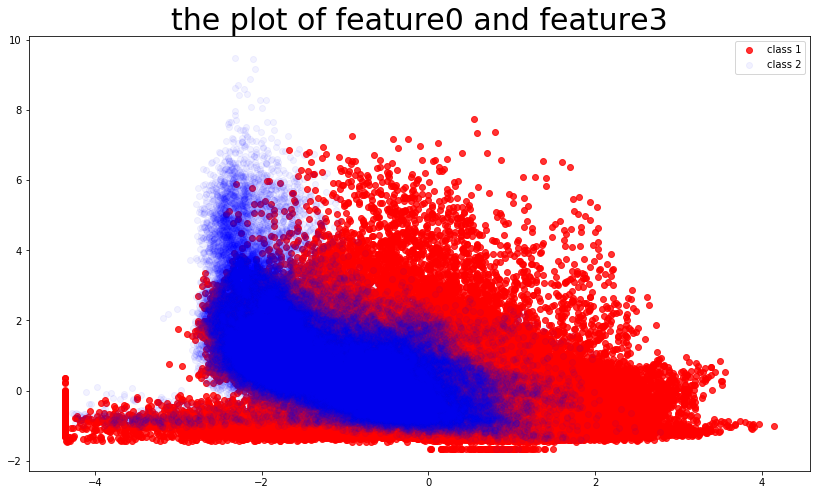

In [48]:
plot_label(0,3,X_train_1,X_train_2)

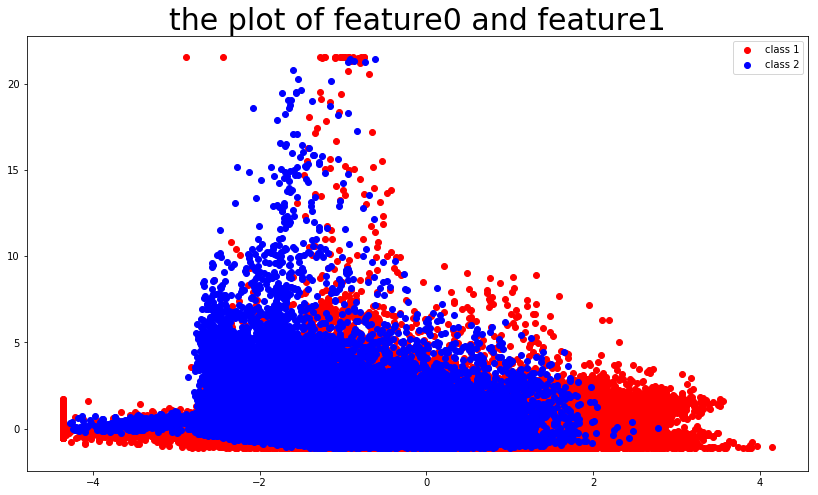

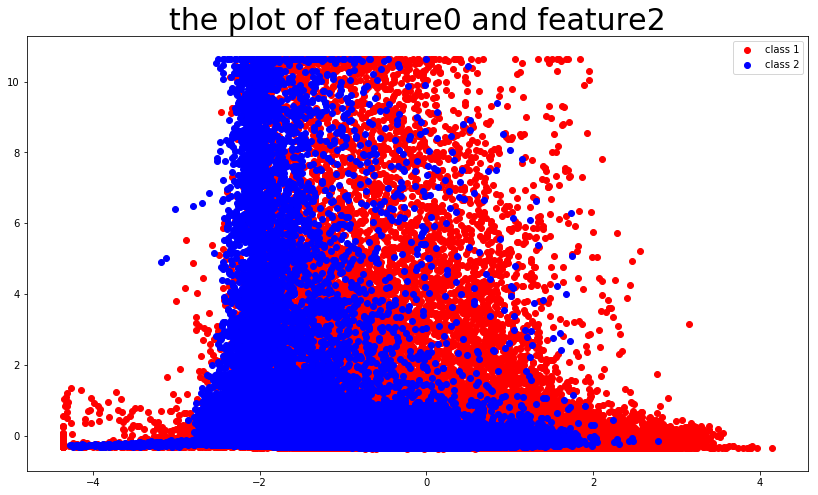

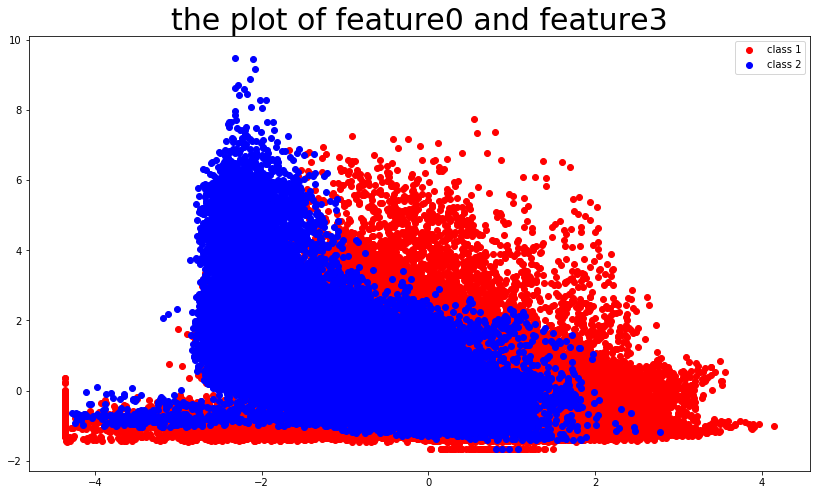

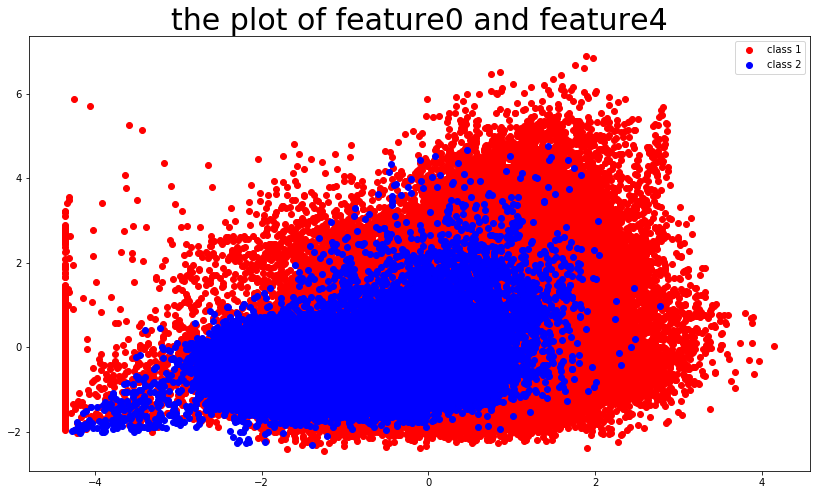

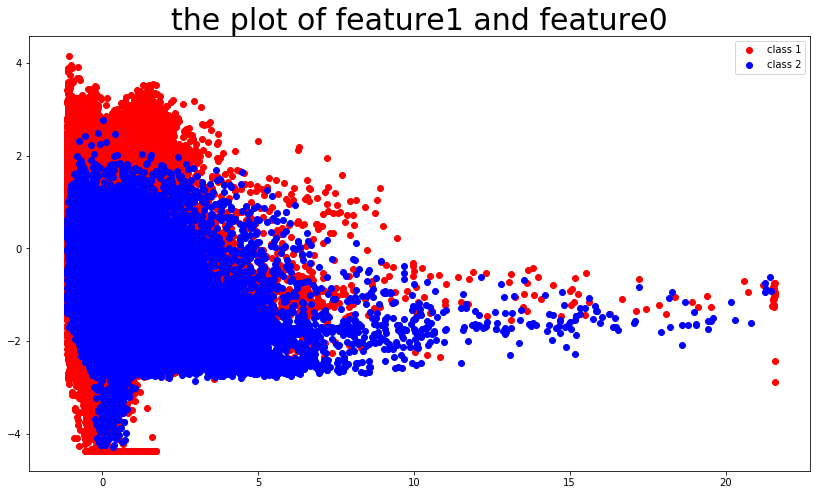

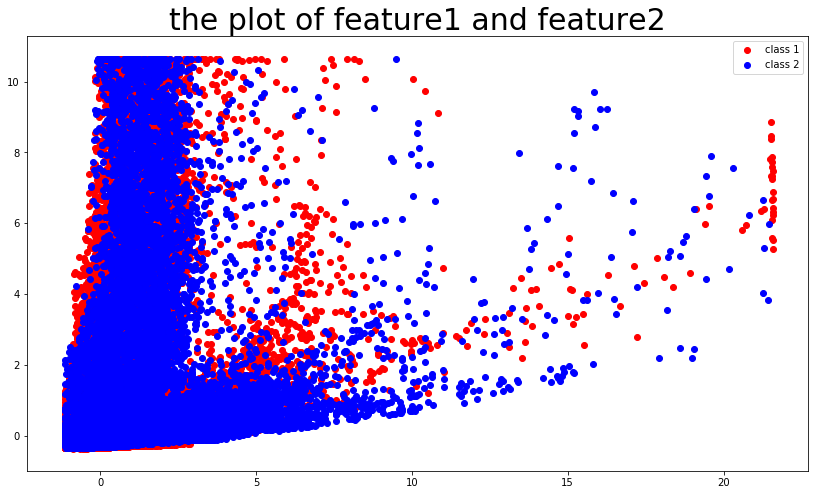

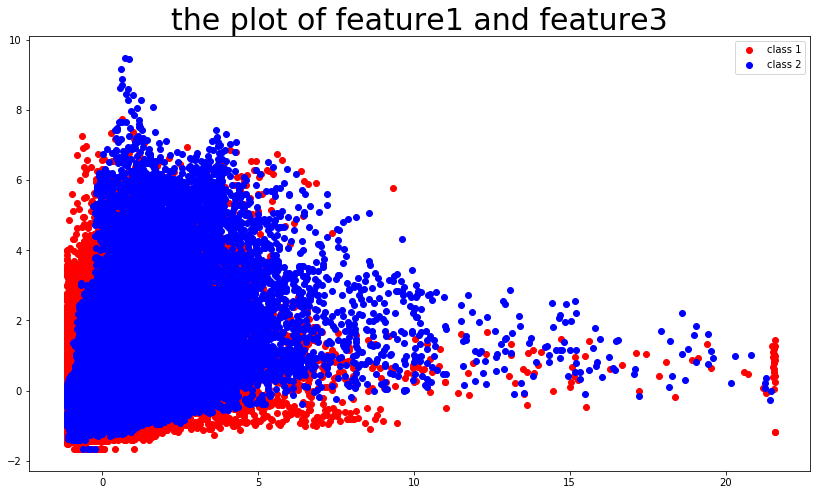

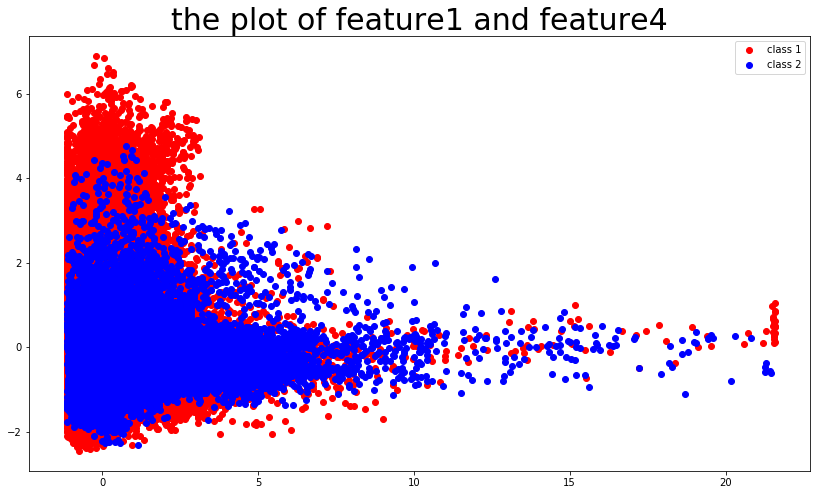

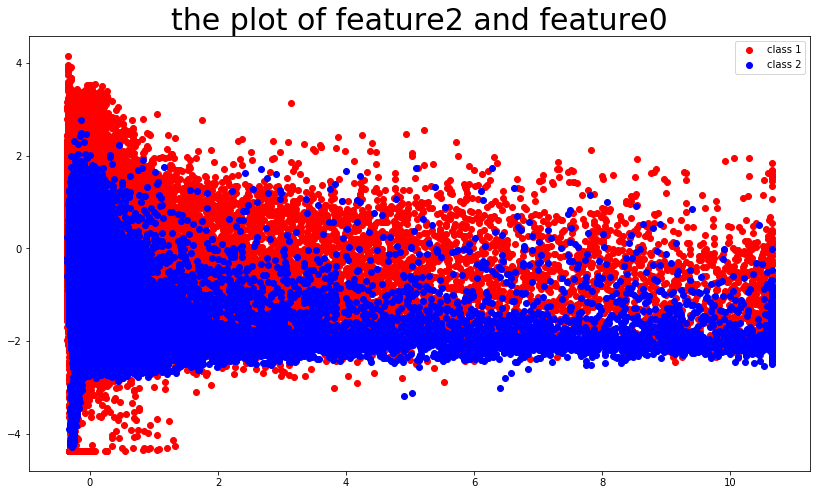

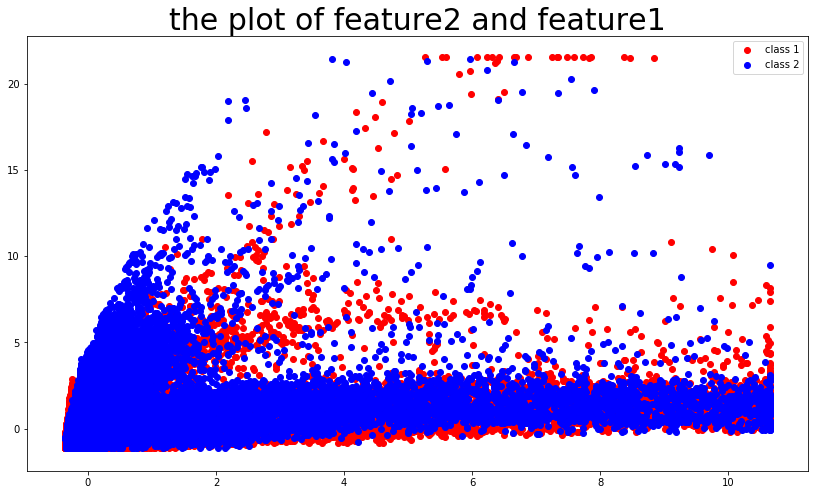

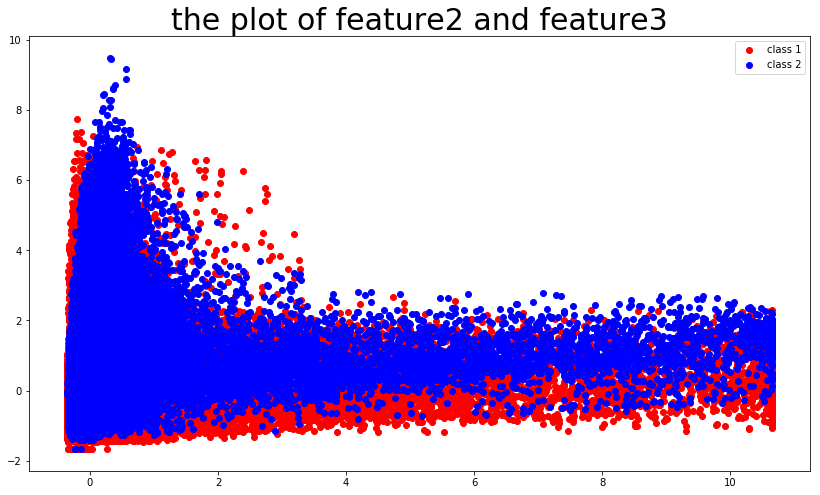

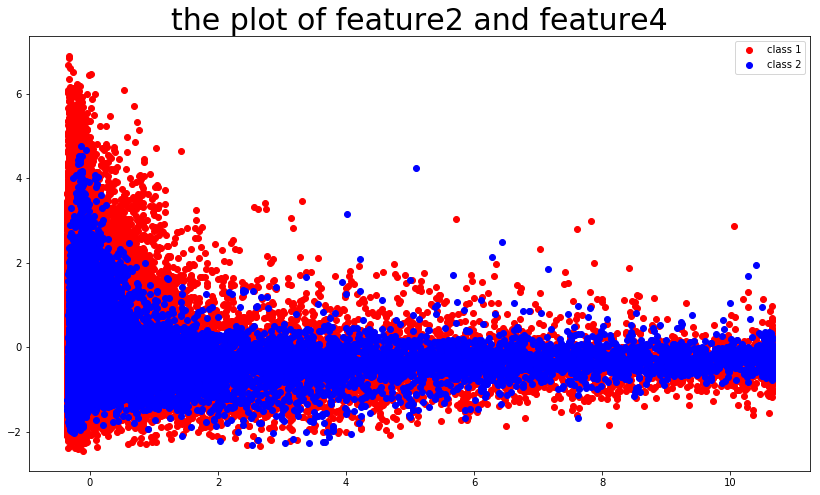

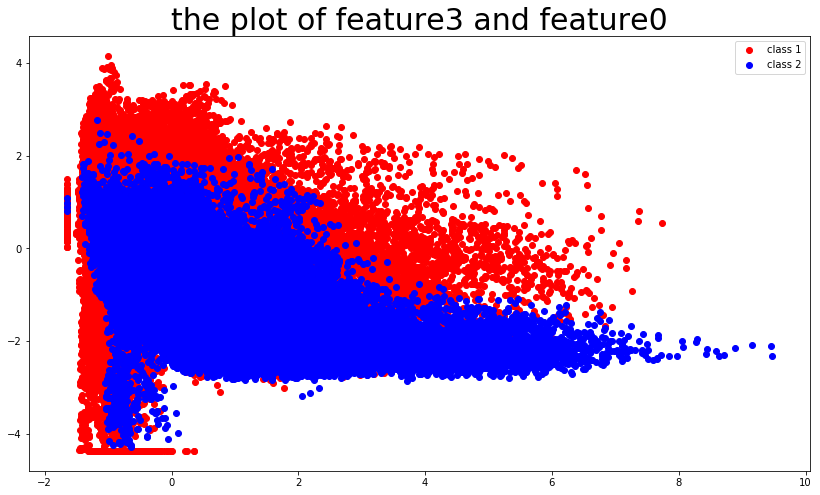

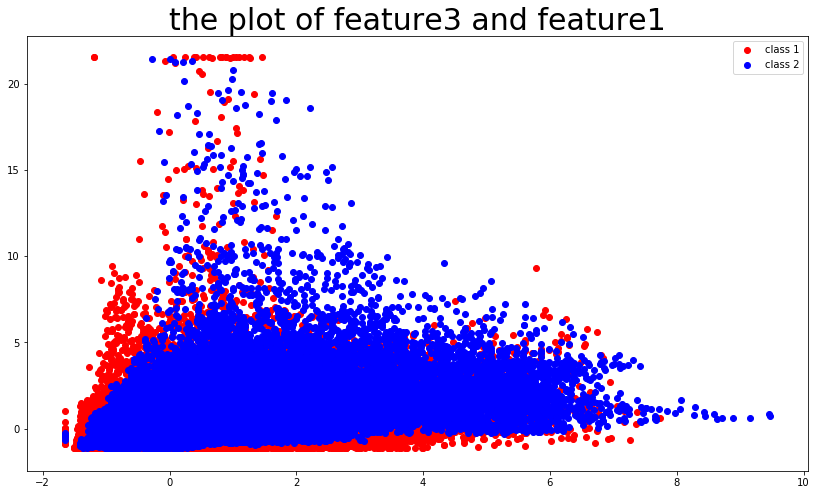

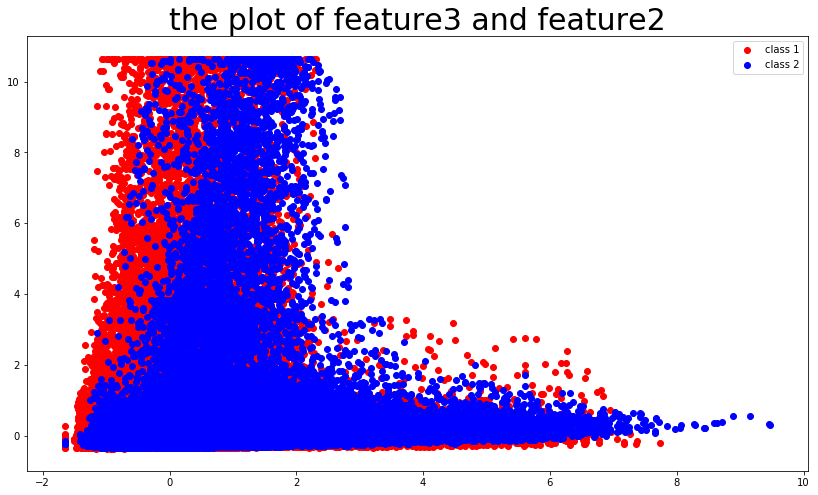

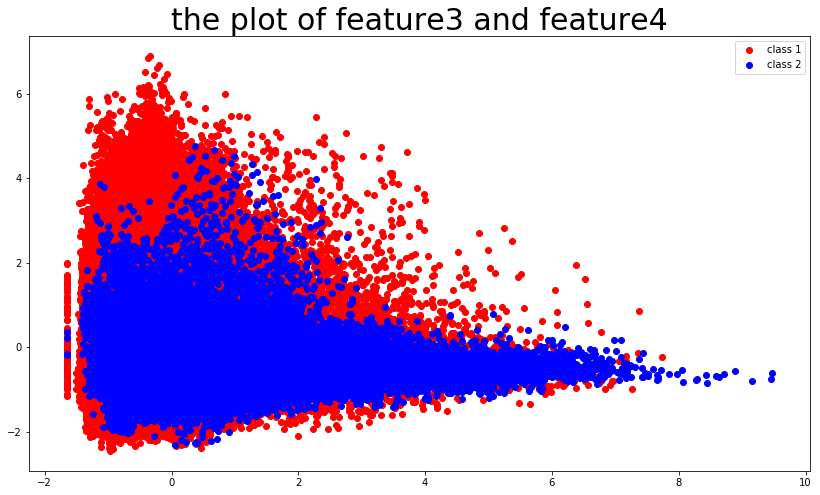

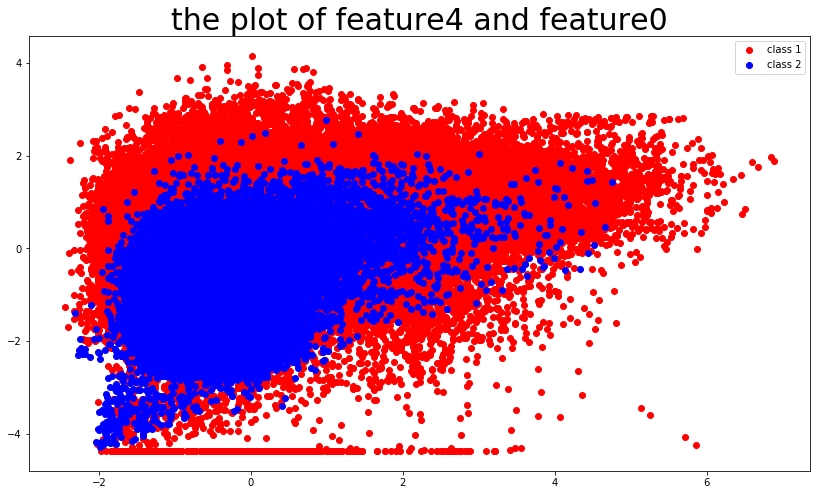

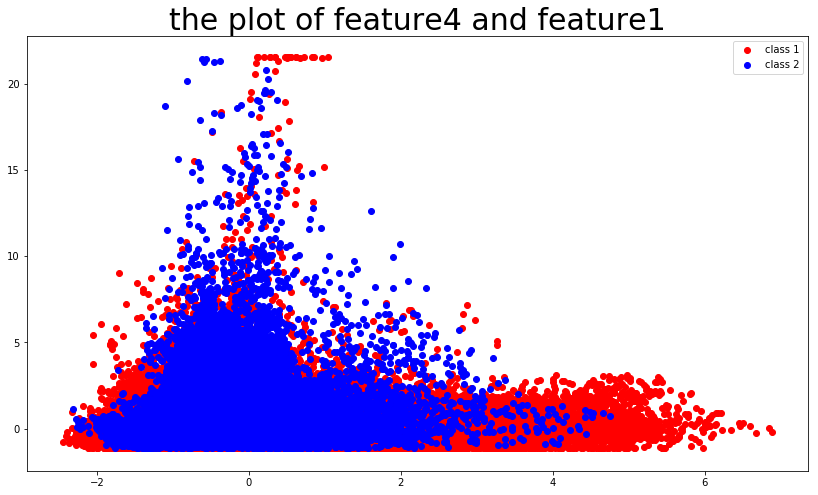

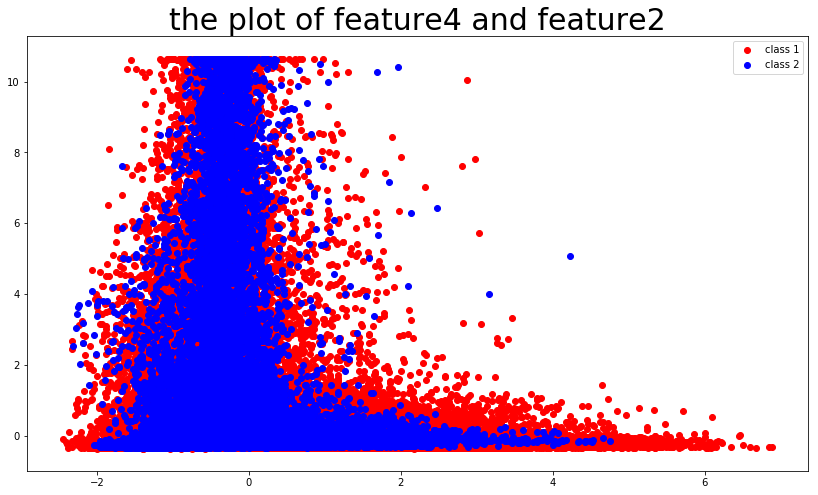

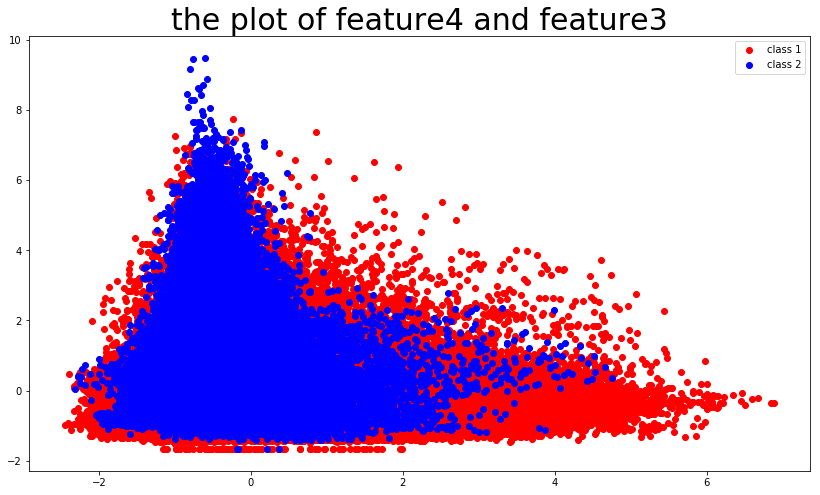

In [40]:
for feature1 in range(5):
    for feature2 in range(5):
        if feature1 == feature2:
            continue
        else:
            plot_label(feature1,feature2,X_train_1,X_train_2)